# Iris Dataset Analysis

## Import required modules

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations as comb

## Load data

The Iris dataset source: Fisher, R. (1936). Iris [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

Since the dataset is structured using comma-separated values, we can use the [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to load it for analysis.

In [38]:
# Pass the file name when calling pandas read_csv() function
# Specifing separator is optional in this case as pandas automatically detects commas
# The file doesn't include a header row as confirmed by checking the original data source
# Column names were manually assigned based on iris.names metadata file
iris_df = pd.read_csv("iris.data", sep=',', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

## Display Data

In [39]:
# Use pandas head function to show the first 5 rows giving an idea of the dataset structure
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
stats = iris_df.describe(include='all')
stats

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Features Summary

Since the dataset contains four numerical features and one categorical feature (`class`), we analyse each feature separately using the appropriate statistics measures.

For the numerical features we summarise data using [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)  functions, calculating mean, median, standard deviation, minimum and maximum values. 

For categorical feature, we identify the numbur of unique classes and values count per each calss.

### Manual Feature Summary

#### Sepal Length

In [41]:
# Sepal length - Statistics Summary
mean = iris_df['sepal_length'].mean()
median = iris_df['sepal_length'].median()
st_dev = iris_df['sepal_length'].std()
min = iris_df['sepal_length'].min()
max = iris_df['sepal_length'].max() 

sepal_len_txt = (f'Sepal length\n\n'
                      f'Mean:\t\t{mean}\n'
                      f'Median:\t\t{median}\n'
                      f'Std Dev:\t{st_dev}\n' 
                      f'Min:\t\t{min}\n' 
                      f'Max:\t\t{max}')

#### Sepal Width

In [42]:
# Sepal width - Statistics Summary
mean = iris_df['sepal_width'].mean()
median = iris_df['sepal_width'].median()
st_dev = iris_df['sepal_width'].std()
min = iris_df['sepal_width'].min()
max = iris_df['sepal_width'].max()

sepal_wid_txt = (f'Sepal width\n\n'
                      f'Mean:\t\t{mean}\n'
                      f'Median:\t\t{median}\n'
                      f'Std Dev:\t{st_dev}\n' 
                      f'Min:\t\t{min}\n' 
                      f'Max:\t\t{max}')


#### Petal Length

In [43]:
# Petal length - Statistics Summary 
mean = iris_df['petal_length'].mean()
median = iris_df['petal_length'].median()
st_dev = iris_df['petal_length'].std()
min = iris_df['petal_length'].min()
max = iris_df['petal_length'].max()

petal_len_txt = (f'Petal length\n\n'
                      f'Mean:\t\t{mean}\n'
                      f'Median:\t\t{median}\n'
                      f'Std Dev:\t{st_dev}\n' 
                      f'Min:\t\t{min}\n' 
                      f'Max:\t\t{max}')

#### Petal Width

In [44]:
# Petal width - Statistics Summary
mean = iris_df['petal_width'].mean()
median = iris_df['petal_width'].median()
st_dev = iris_df['petal_width'].std()       
min = iris_df['petal_width'].min()
max = iris_df['petal_width'].max()

petal_wid_txt = (f'Petal width\n\n'
                      f'Mean:\t\t{mean}\n'
                      f'Median:\t\t{median}\n'
                      f'Std Dev:\t{st_dev}\n' 
                      f'Min:\t\t{min}\n' 
                      f'Max:\t\t{max}')

#### Class

In [45]:
# Class - Statistics Summary
unique_class = iris_df['class'].unique()
frequency = iris_df['class'].value_counts()

class_txt = (f'Class\n\n'
                  f'Unique values:\t{unique_class}\n'
                  f'Value Frequency:\n{frequency}')
print(class_txt)

Class

Unique values:	['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Value Frequency:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


#### Save Feature Summary to File

In [46]:
filename = 'summary.txt'

with open(filename, 'w') as f:
    f.write(f'{sepal_len_txt}')
    f.write('\n\n\n')
    f.write(f'{sepal_wid_txt}')
    f.write('\n\n\n')
    f.write(f'{petal_len_txt}')
    f.write('\n\n\n')
    f.write(f'{petal_wid_txt}')
    f.write('\n\n\n')
    f.write(f'{class_txt}')



### Consolidating Feature Summary Into a Function 

Since manual calculation is repetetive, now we can create a function that will automate the process of getting feauters summary.

In [47]:
# Check the data types of each column
data_type = iris_df.dtypes

# Show data types
data_type

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [48]:
# Check accessing features (columns) of the dataset
# Using the columns attribute, which returns the column names
features = iris_df.columns

# Sshow features
features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [49]:
"""
Write a function that takes a list of features and returns a string with summary statistics for each feature.
"""
def summary_stats(features):
    # Initialize an empty string for the function to append the summary of each feature 
    summary_string = ""

    # Iterate through each feature (column) in the list of features using a for loop
    # Feature names are stored in the variable "features" defined outside the function
    for column in features:

        # Since the function performs certain calculations based on the column data type defined within the if/elif blocks, use try-except to handle any potential data type errors
        # The try block contains the code that might raise an error
        try:

            # We know that Iris dataset contains numerical and categorical data
            # We can check the data type of each column using the if function and the dtype attribute
            # [] is used to access the column in the dataframe
            if iris_df[column].dtype == 'float64':
                
                # For numerical data, use pandas.DataFrame functions to calculate summary statistics: mean, median, standard deviation, min, and max
                mean = iris_df[column].mean()
                median = iris_df[column].median()
                st_dev = iris_df[column].std()
                min = iris_df[column].min()
                max = iris_df[column].max() 

                # Create a summary string for the numerical feature using f-string formatting 
                # To dynamically create the string we pass the column name in the first line followed by the calculated statistics values
                # The \n character is used to create a new line in the string for readability 
                # The \t character is used to create a tab space in the string - it allows to align calculated values so the output looks neat
                feature_summary = (f'{column}\n\n'
                            f'Mean:\t\t{mean}\n'
                            f'Median:\t\t{median}\n'
                            f'Std Dev:\t{st_dev}\n' 
                            f'Min:\t\t{min}\n' 
                            f'Max:\t\t{max}')
                
            # Using elif instead of else to give the function a different instruction for a specific data type 
            elif iris_df[column].dtype == 'object':

                # For categorical data we use pandas.Series functions to describe unique classes and values frequency within each class
                unique_class = iris_df[column].unique()
                frequency = iris_df[column].value_counts()  
                
                # Create a summary string for the categorical feature using f-string formatting
                feature_summary = (f'{column}\n\n'
                            f'Unique Classes:\t{unique_class}\n'
                            f'Value Frequency:\n{frequency}')

            # Append the summary string for each feature to the summary_string variable
            # Add two new lines to separate each feature summary for readability
            summary_string += feature_summary + "\n\n"
        
        # The except block is executed if an error occurs in the try block
        # It outputs a alert string if the program encounterred any other data type other than float64 or object
        except:
            feature_summary = (f'{column}\n\n'
                 f"Summary could not be created for {column} due to unsupported data type {iris_df[column].dtype}")
            
            # Append the alert string to the summary_string variable
            summary_string += feature_summary + "\n\n"
    
    # Return the summary_string variable containing the summary for all features
    return summary_string 
    
# Assign the list of features (columns) to a variable to be used inside the summary stats function
features = iris_df.columns

# Call the summary_stats function and pass the features variable to it
summary_stats(features)

# Initiate a variable to store the summary statistics in a text file
filename = 'summary.txt'

# Open the file in write mode using the with statement
with open(filename,'w') as f:
    # Call the summary_stats function that outputs the summary for each feature into the file
    f.write(summary_stats(features))

### References for Summary Stats function
The following resources have been used to construct the summary_stats function: 
- Accessing columns:
  - [columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)
- Selecting columns one by one within for loop:
  - Pandas guiie on using [[]](https://pandas.pydata.org/docs/user_guide/indexing.html) for selecting columns
- Validating data type: 
  - [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) method
  - [dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) user guide
- Statisticts functions within pandas.DataFrame for numerical columns:
  - [mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)
  - [median](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)
  - [std](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html)
  - [min](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html)
  - [max](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)
- Functions within pandas.Series for analysing categorical data:
  - [unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)
  - [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
- Adding strings:
  - The following [Datacamp](https://www.datacamp.com/tutorial/python-append-string) tutorial was referenced on method to concatenate strings

## Visualize Data

### Histogram
>A histogram is a statistical graph that represents the distribution of a continuous dataset through plotted bars, each representing a particular category or class interval. The bar height reflects the frequency or count of data points within each group.

(Source: [Jaspersoft](http://jaspersoft.com/articles/what-is-a-histogram-chart) article)


We use Matplotlib library for creating histograms for each feature. 

Create a sample histogram for each data type:

Text(0.5, 1.0, 'Sepal Length')

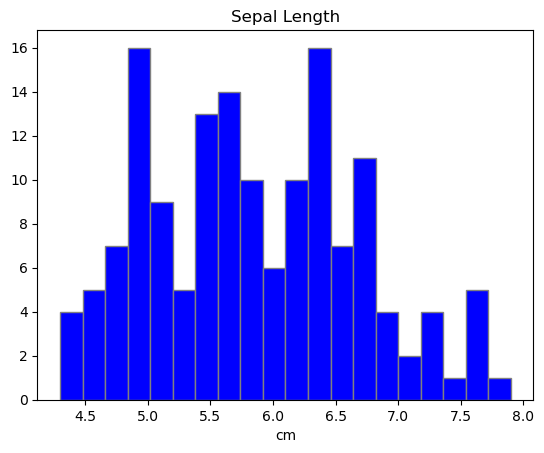

In [50]:
# Sepal Length

# Plot histogram
# bins is an optional parameter, default = 10
plt.hist(iris_df['sepal_length'], bins=20, color='b', edgecolor = 'gray')

# Add labels
plt.xlabel('cm')

# Add title
plt.title('Sepal Length')

Text(0.5, 1.0, 'Class')

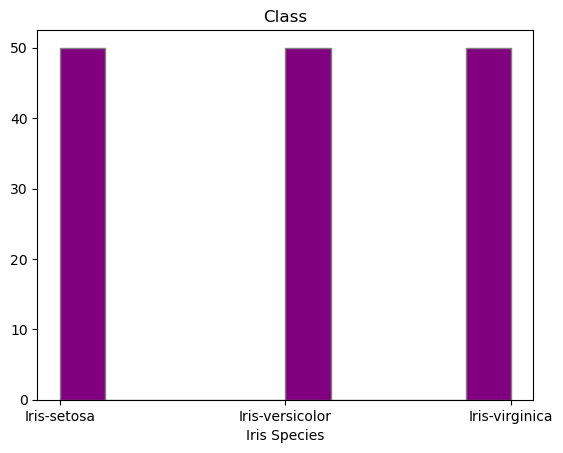

In [51]:
# Sepal Length

# Plot histogram
# bins is an optional parameter, default = 10
plt.hist(iris_df['class'], color = 'purple', edgecolor = 'gray')

# Add labels
plt.xlabel('Iris Species')

# Add title
plt.title('Class')

### Consolidating Feature Histogram Creation Into a Function
In order to automatically create histograms for each dataset feature we will utilise the structure of previously created summary_stats() function where applicable and add necessary modifications. If the use of certain methods and functions has been explained in the previous steps, we won't add commentary again to allow for cleaner and readable program. 

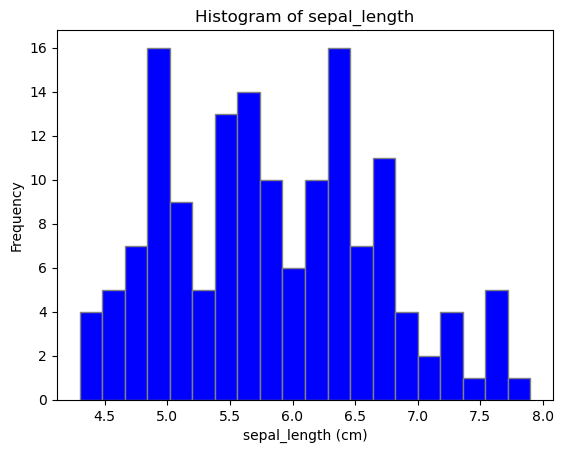

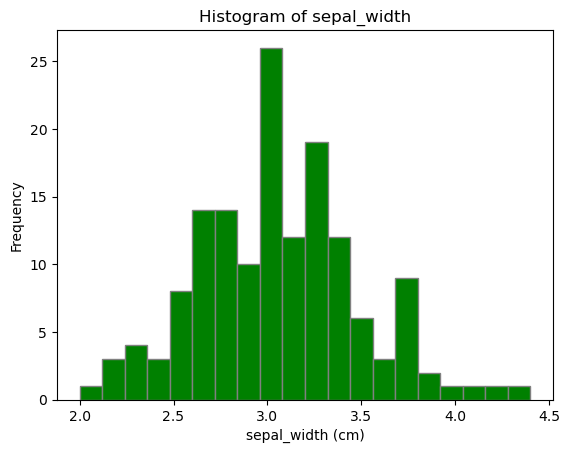

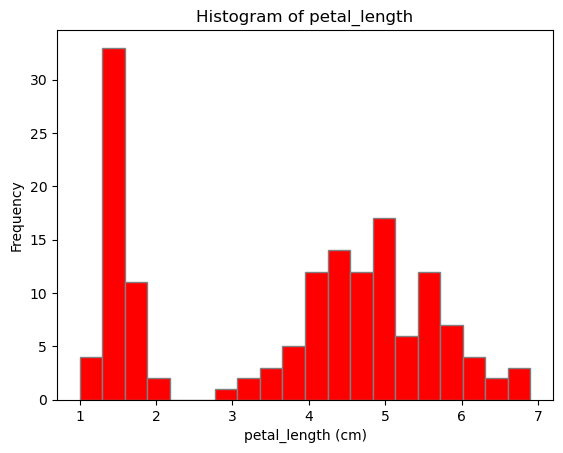

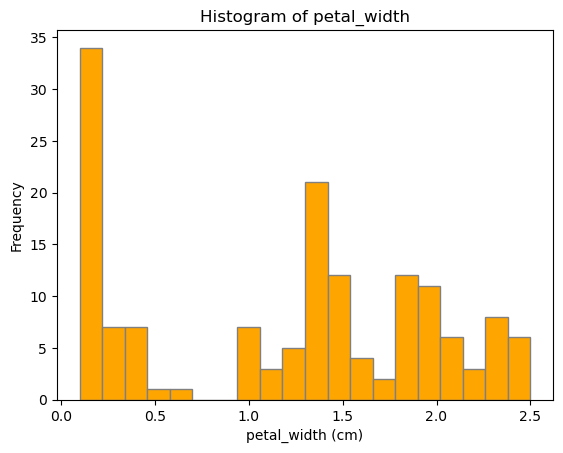

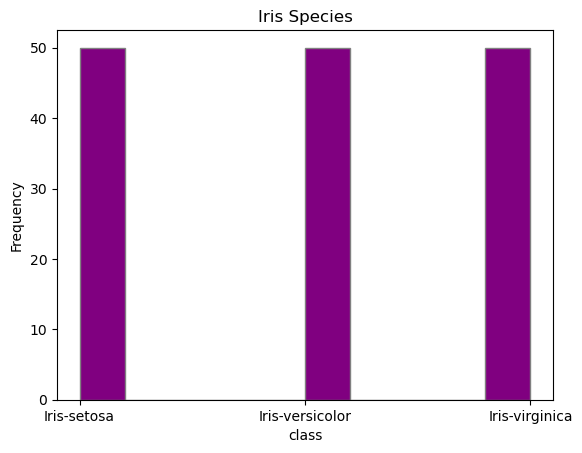

In [52]:
"""
Write a function that takes a list of features and returns a histogram for each feature.
"""
def feature_hist(features):

    # Create a list of colors to be used for histograms
    # This allows to set a different color for each feature histogram to make them visually distinct
    colors = ['blue', 'green', 'red', 'orange', 'purple']
    
    # Set a for loop to iterate through:
    #   1. Each color from the "colors" list defined above,
    #   2. Eeach feature (column) in the list of features defined outside the function
    # Use the enumerate() function to add a counter along with feature names passed through the features variable
    # The enumerate() function returns both the index and the value of each item in the list
    # The counter (or index) is used to select the color from the colors list
    # The feature name (or column) is used to access feature values in the dataframe
    for i, column in enumerate(features):

        # Use try-except to handle any potential errors
        try:

            # Check the data type of each column using the if function and the dtype attribute
            if iris_df[column].dtype == 'float64':

                # Initiate an empty figure as a placeholder for each feature histogram
                # This allows to create a new figure for each histogram and to avoid overlapping histogrmas on the same figure
                plt.figure() 

                # Create variable "color" to pass it as an argument to the histogram 
                # Use counter [i] along with the modulo operator % to select a color from the colors list above
                # The modulo operator % returns the remainder of the division of i by the length of the colors list
                # This allows to cycle through the colors list. The same color can be used for multiple histograms if there are more features than colors
                color = colors[i % len(colors)]

                # Use Matplotlib to plot a histogram 
                # bins is an optional parameter, default = 10
                # The color and edgecolor parameters are used to set the color of the bars and the color of the edges respectively (also optional parameters)
                plt.hist(iris_df[column], color = color, bins=20, edgecolor = 'gray')

                # Set axes labels using xlabel() and ylabel() functions
                # For x axis we use the column name and add a unit of measurement (cm)
                plt.xlabel(f"{column} (cm)")

                # For y axis we use the count of values, i.e. frequency of how many times each flower with a particular measure appears in the dataset
                plt.ylabel('Frequency')

                # Add title
                plt.title(f"Histogram of {column}")

                # Create a variable to save the histogram figure
                # The savefig() function saves the plot to a file as ".png"
                saved_fig = plt.savefig(f'{column}_plot.png')
            
            elif iris_df[column].dtype == 'object':

                # Initiate an empty figure
                plt.figure()

                # Plot a different histogram for categorical data
                plt.hist(iris_df[column], color = 'purple', edgecolor = 'gray')

                # For x axis we use the column name
                plt.xlabel(f'{column}')

                # For y axis we use the count of values, i.e. frequency of how many times each flower appears in the dataset
                plt.ylabel('Frequency')

                # Add title 
                plt.title('Iris Species')
                
                # Create a variable to save the histogram figure
                saved_fig = plt.savefig(f'{column}_plot.png')           
       
        # The except block is executed if an error occurs in the try block
        # It outputs a message
        except:
            print(f'Histogram could not be created for feature {column} due to unsupported data type {iris_df[column].dtype}')
    
    # Return the saved figure variable
    return saved_fig
    
# Assign the list of features (columns) to a variable to be used inside the summary stats function
features = iris_df.columns

# Call the feature_hist function and pass the features variable to it
feature_hist(features)


### References for Feature Hist function
The following resources have been used to construct the feature_hist function: 
- Assigning different colors for each feature hostogram:
    - Chat GPT has been used for finding a suitable method to assign various colors within a function. The following solution inspired by Chat GPT has been implemented: 
        - Creating a list of colors to be used for different features histograms;
        - Including index "i" and [enumerate()](https://www.w3schools.com/python/ref_func_enumerate.asp) function to the for loop logic;
        - Using modulo operator % to set a condition for color assignment for each feature. Furthar learning on the usage of modulo operator in this context was done using the following [RealPython](https://realpython.com/python-modulo-operator/#how-to-create-cyclic-iteration) tutorial;
- Histograms creation: 
    - [Matplotlib](https://matplotlib.org/stable/) library was imported to enable creating plots for this project
    - [Histograms](https://matplotlib.org/stable/gallery/statistics/hist.html) documentation within Matplotlib was used to create plots

    

### Scatter Plot
>A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

(Source: [Atlassian](https://www.atlassian.com/data/charts/what-is-a-scatter-plot) guide)

We will explore ways to create scatter plots using Matplotlib and Seaborn libraries.

Create a sample plot for two features using **Matplotlib**. 

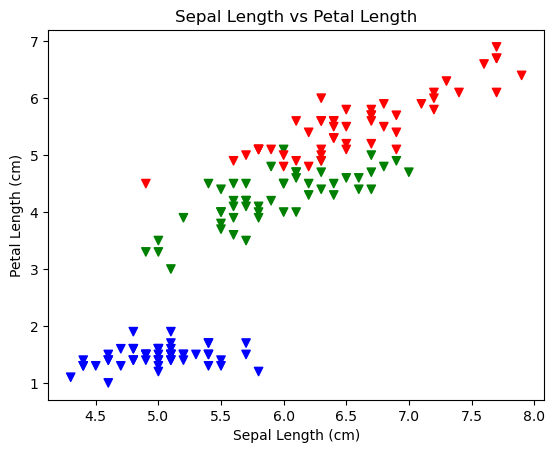

In [53]:
# Explore Sepal Length and Petal Length relationship
# Create a figure (fig) and axes (ax) using the subplots() function, where:
#   The figure acts as an empty box for a plot
#   The axes represents a plot area
fig, ax = plt.subplots()

# We want to show the relationship between two numerical features and color them with distinct colors based on the class of the flower
# In order to do this we need to create a mapping of each class to a color
# This can be done using a dictionary with class to color mapping (see References below on the source for this approach)
class_color_mapping = {'Iris-setosa': 'blue', 
                 'Iris-versicolor': 'green', 
                 'Iris-virginica': 'red'}

# Use the .map() function to map the class values to colors
colors = iris_df['class'].map(class_color_mapping)

# Create a scatter plot using the scatter() function
# Pass x & y values (sepal_length and petal_length)
# "marker" v sets values figures to triangles (optional parameter)
# "c" argument assigns colors mapped from the flower class labels using the class_color_mapping dictionary (optional parameter)
ax.scatter(iris_df['sepal_length'], iris_df['petal_length'], marker =  'v', c = colors)
           
# Set axes labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')

# Add title
ax.set_title('Sepal Length vs Petal Length')

# Show the plot
plt.show()

### References

The matplotlib scatter plot has been inspired by a methodology explained in the following [StackOverflow](https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels) post. 

Additional resources used: 
- [.map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) function was used to assign colors to class values
- [Scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) documentation within Matplotlib was used to create scatter plot.

While this method works, it seems a bit manual. Since we aim to automate our analysis. Seaborn may offer a simpler and more efficient solution for our goal. 

Create a sample plot for two features using **Seaborn**. 

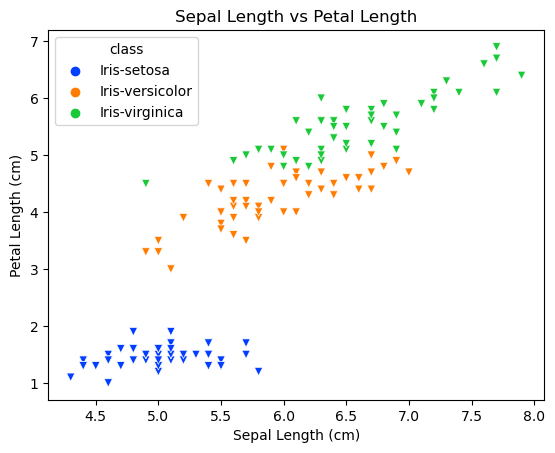

In [59]:
# Explore Sepal Length and Petal Length relationship
# Using Seaborn library create a scatter plot
# Pass iris_df dataframe, x & y values (sepal_length and petal_length)
# "hue" argument automatically assigns distinct colors to each class by bapping the argument to the class column
# "marker" v sets values figures to triangles (optional parameter)

sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='class', marker='v')

# Set axes labels 
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

# Add title
plt.title('Sepal Length vs Petal Length')

# Show the plot
plt.show()          

### References
[Scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) documentation within Seabiorn library.

### Consolidating creation of scatter plots for feature pairs into a function
In order to automatically create scatter plots for each pair of features we will utilise the structure of previously created feature_hist() function where applicable and add necessary modifications. Previously used and explained methods and functions won't carry commentary to allow for cleaner and readable program. 

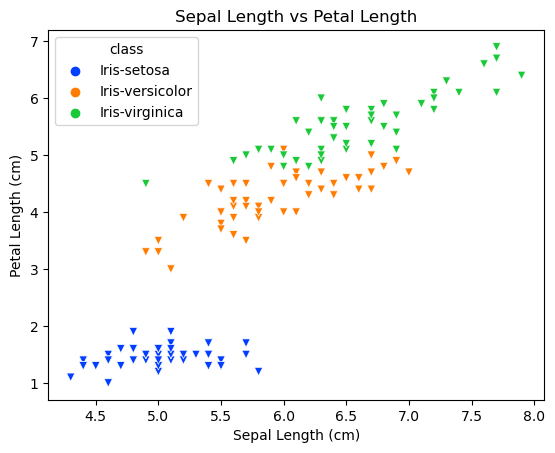

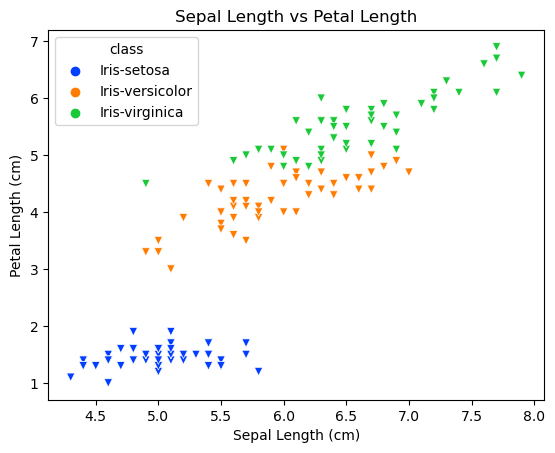

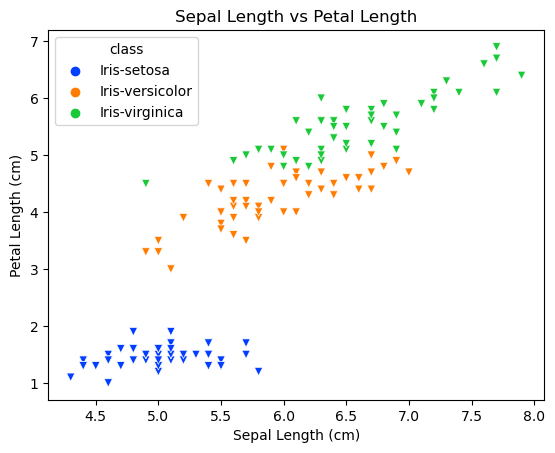

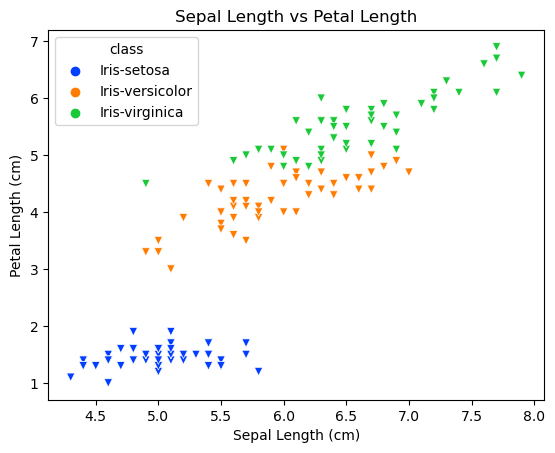

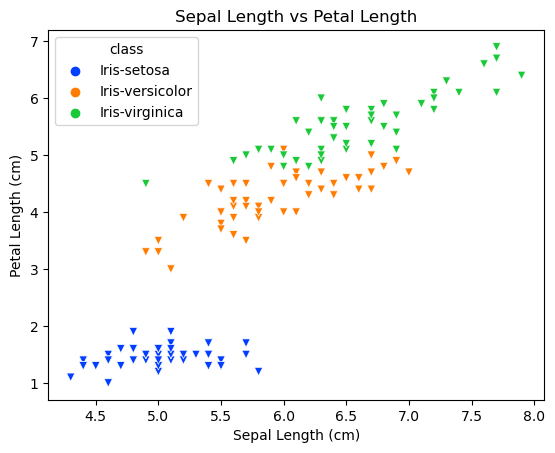

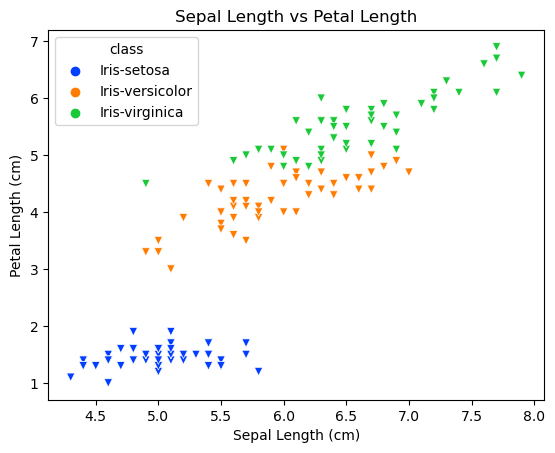

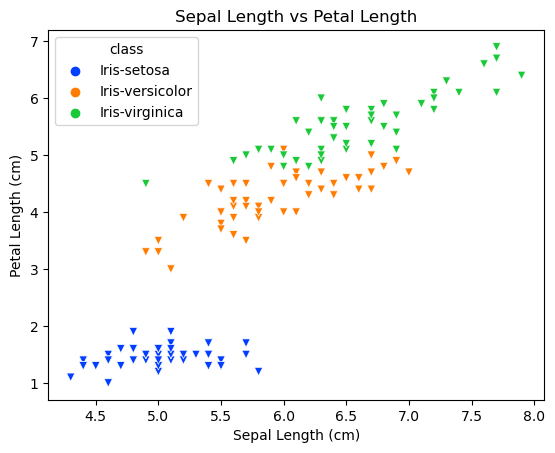

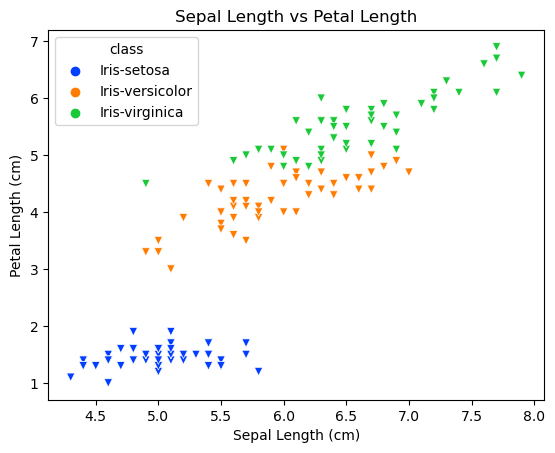

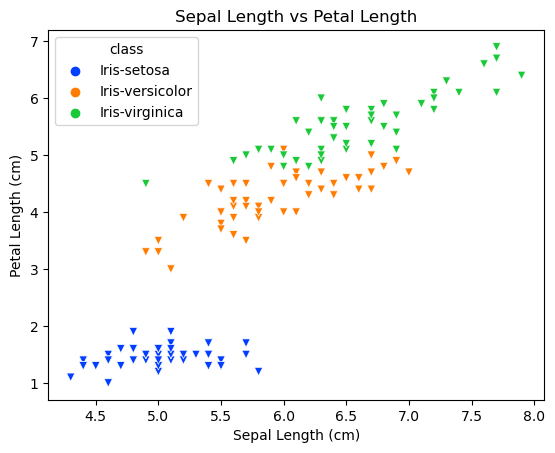

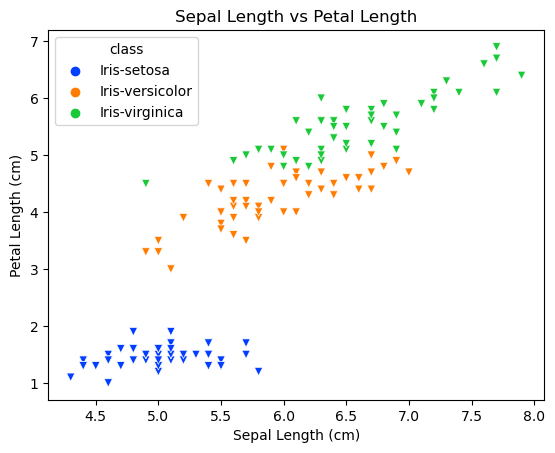

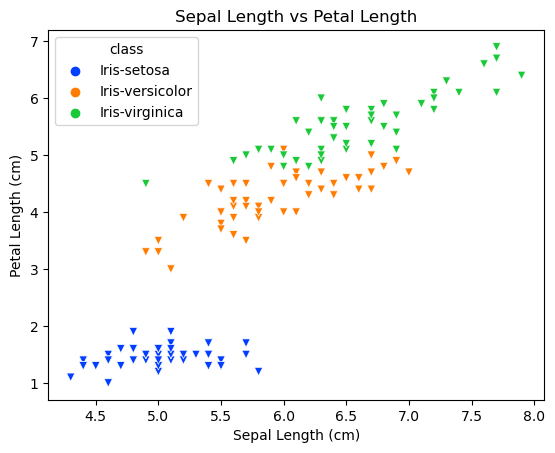

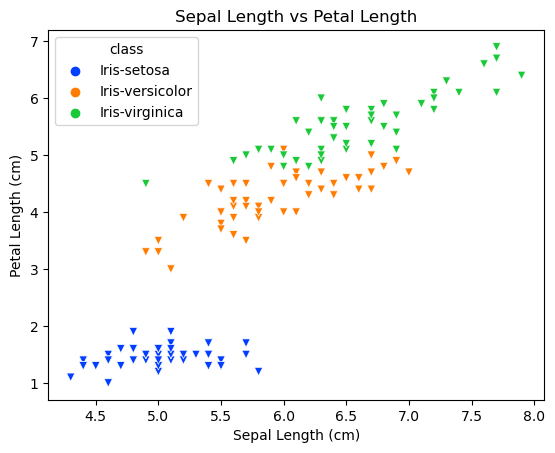

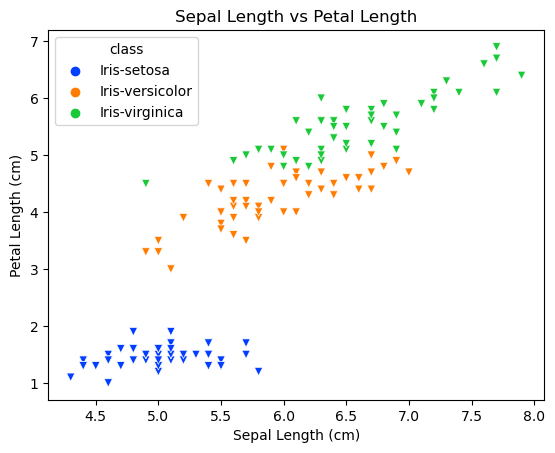

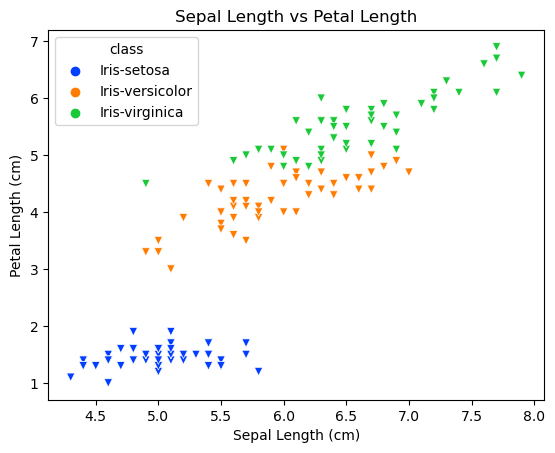

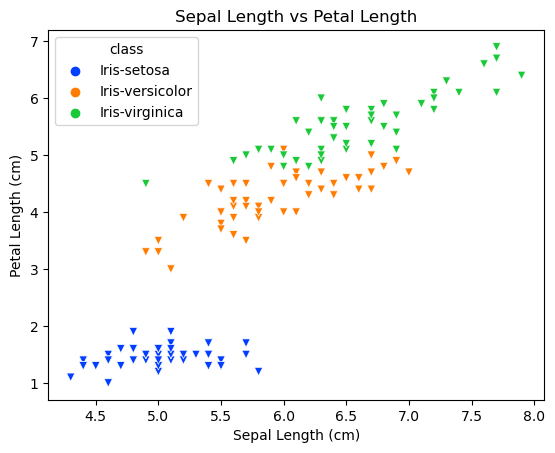

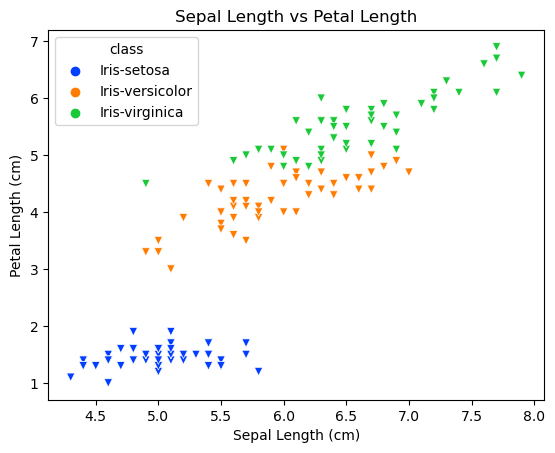

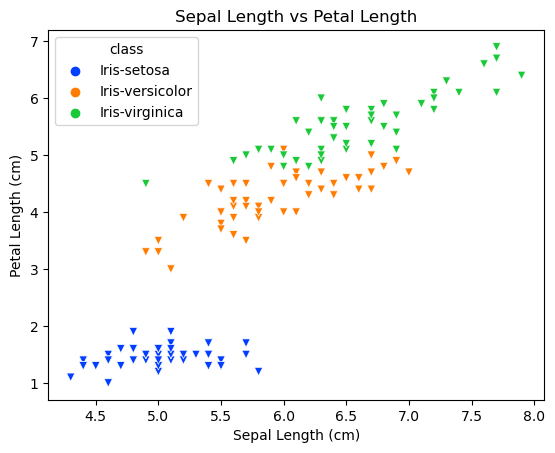

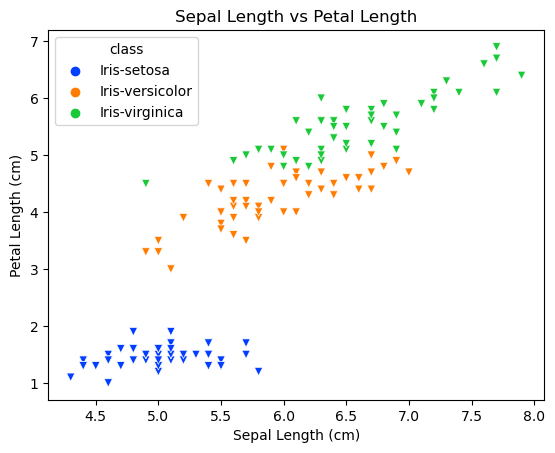

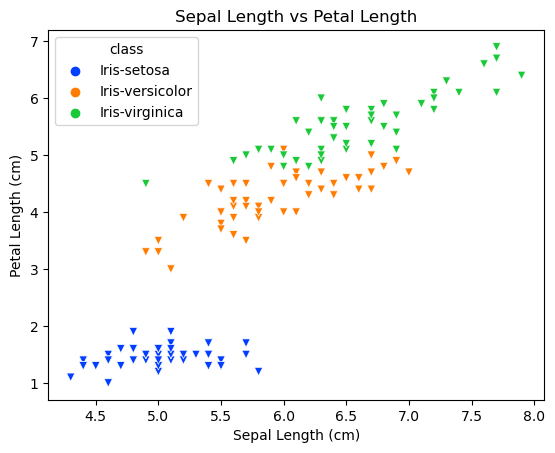

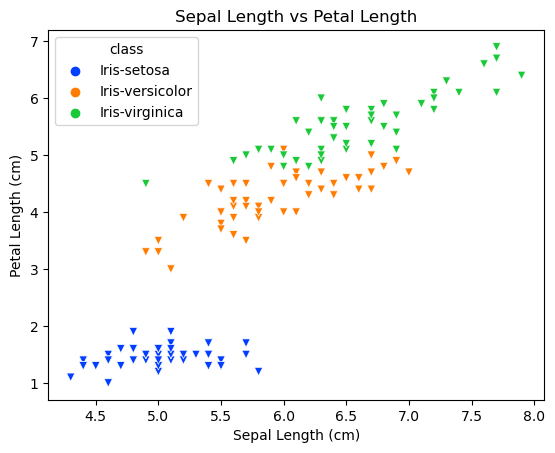

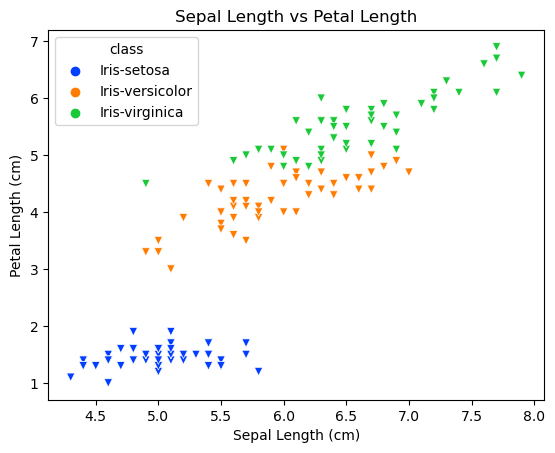

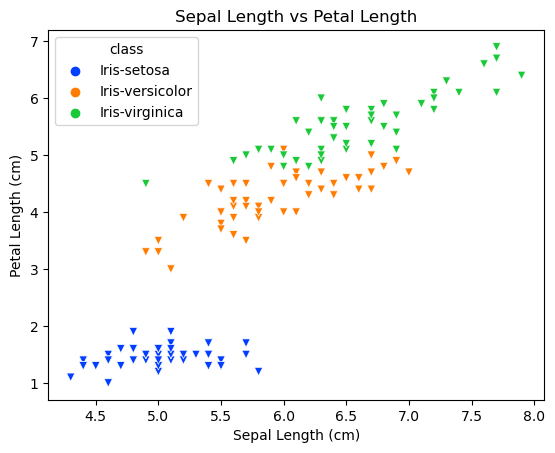

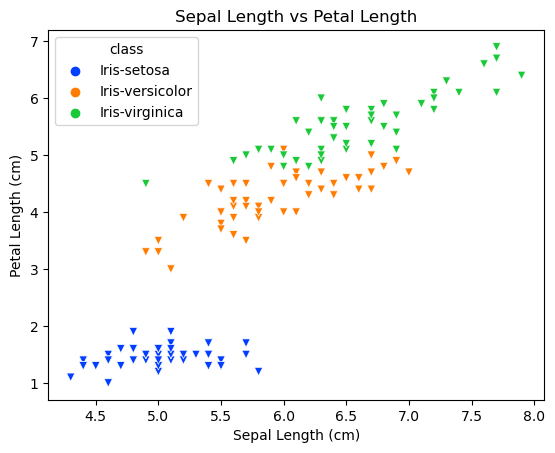

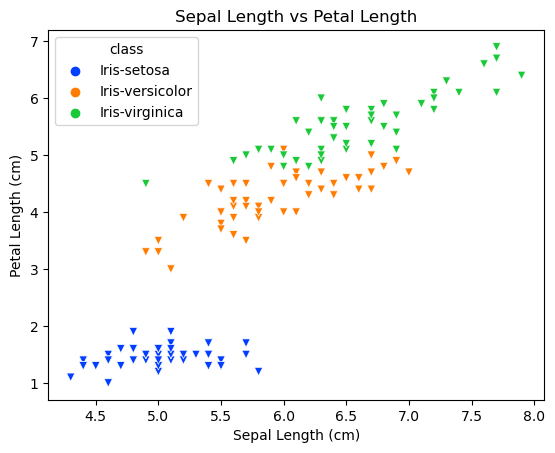

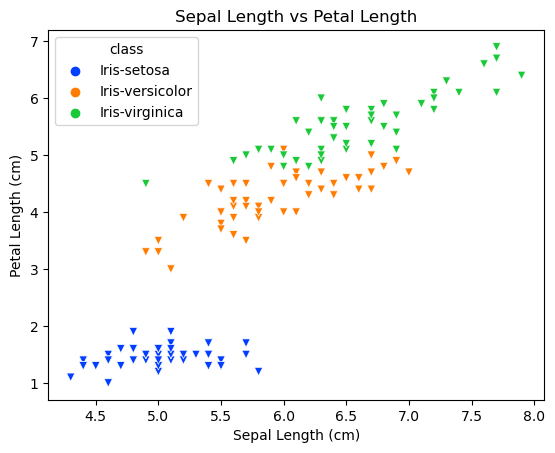

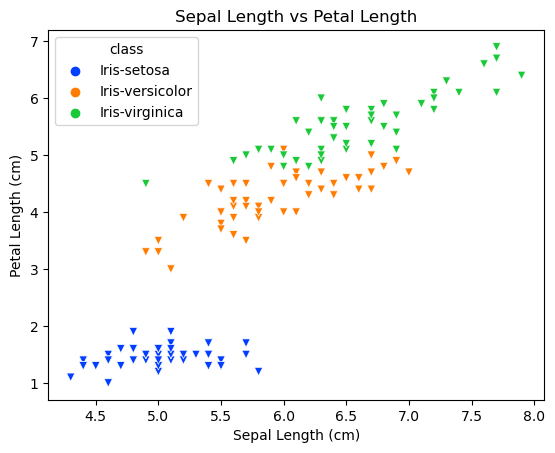

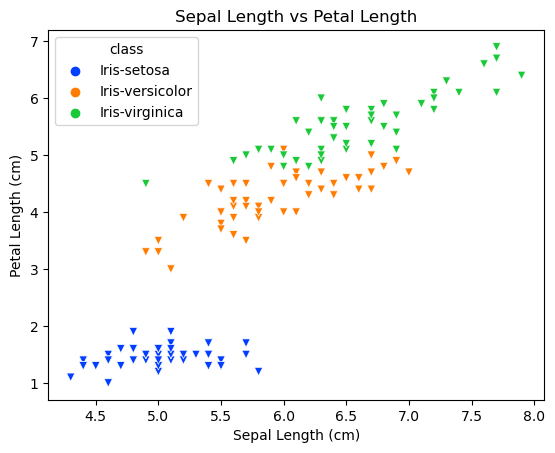

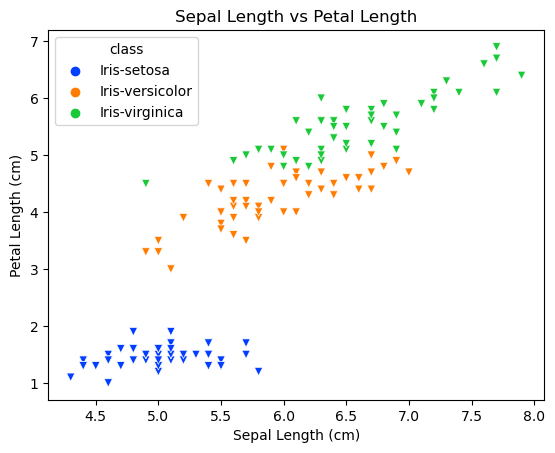

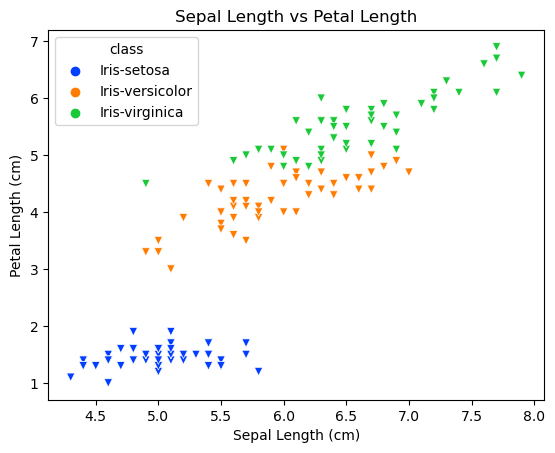

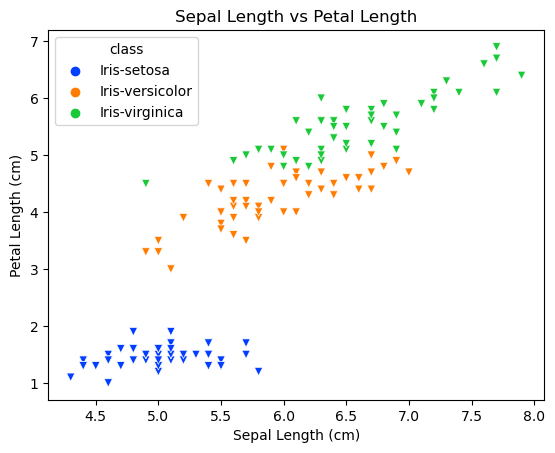

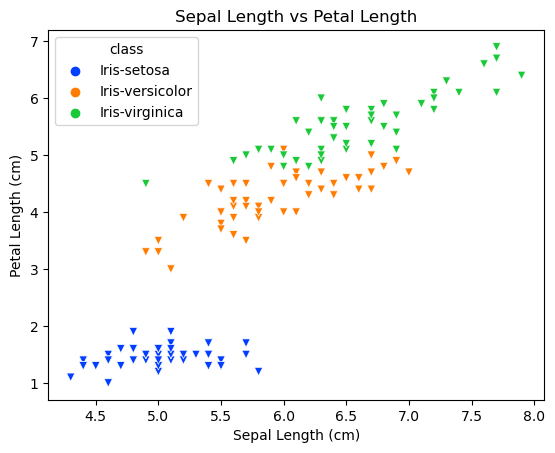

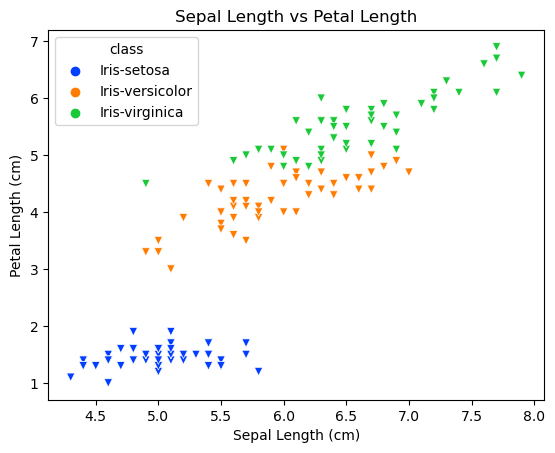

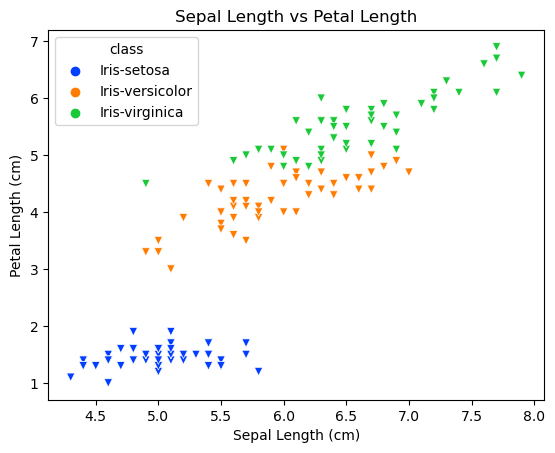

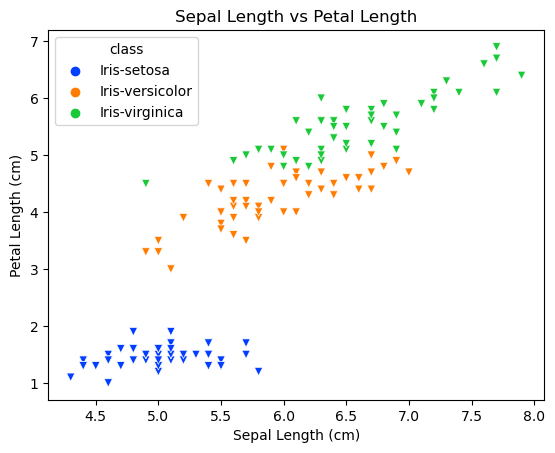

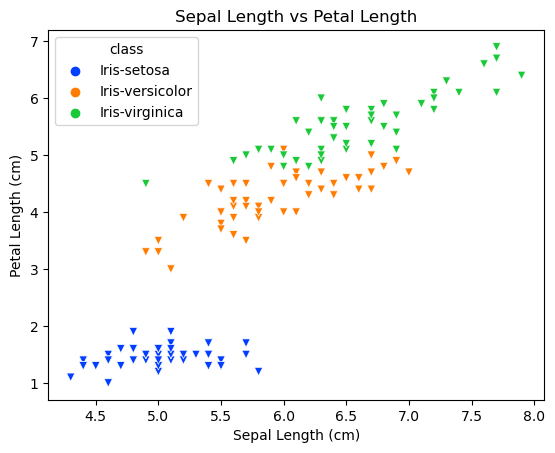

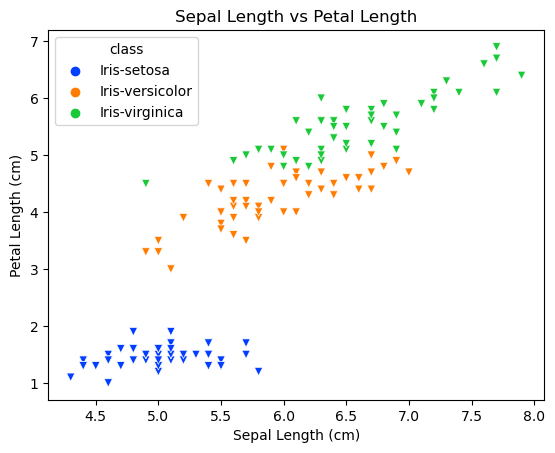

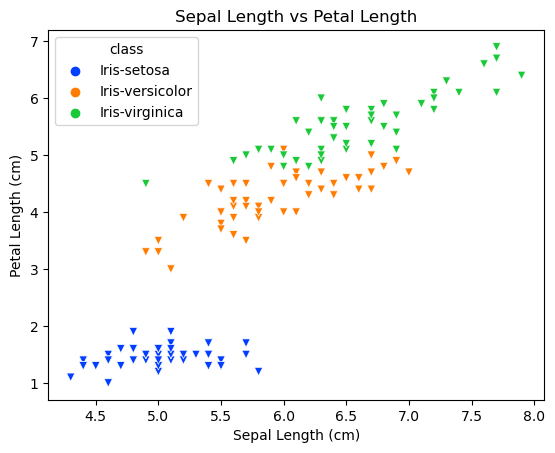

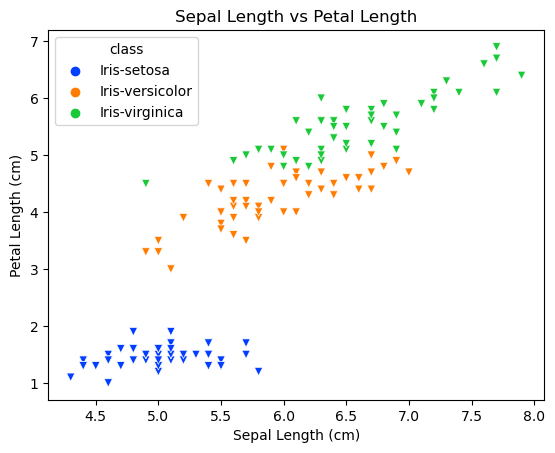

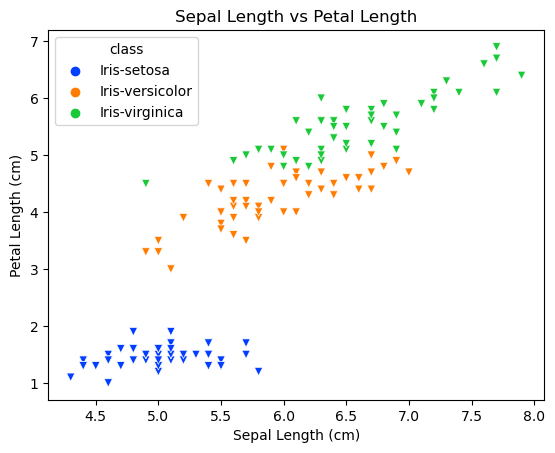

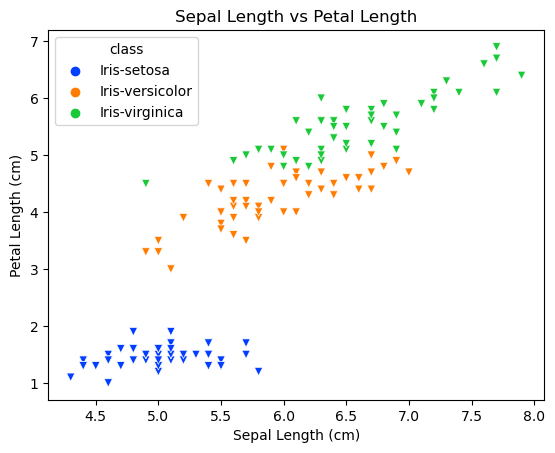

In [65]:
"""
Write a function that takes a list of features and returns a scatter plot for each pair of features. 
"""
def feature_scatter(features):
    
    # Set a for loop to iterate through:
    #   1. Each color from the "colors" list defined above,
    #   2. Eeach feature (column) in the list of features defined outside the function
    # Use the enumerate() function to add a counter along with feature names passed through the features variable
    # The enumerate() function returns both the index and the value of each item in the list
    # The counter (or index) is used to select the color from the colors list
    # The feature name (or column) is used to access feature values in the dataframe
    for i, column in enumerate(features):

        # Use try-except to handle any potential errors
        try:

            # Check the data type of each column using the if function and the dtype attribute
            if iris_df[column].dtype == 'float64':

                # Initiate an empty figure as a placeholder for each feature histogram
                # This allows to create a new figure for each histogram and to avoid overlapping histogrmas on the same figure
                # plt.figure() 
                for i in comb(iris_df.columns, 2):

                    sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='class', marker='v')

                    # Set axes labels 
                    plt.xlabel('Sepal Length (cm)')
                    plt.ylabel('Petal Length (cm)')

                    # Add title
                    plt.title('Sepal Length vs Petal Length')

                    # Show the plot
                    plt.show()    
               
       
        # The except block is executed if an error occurs in the try block
        # It outputs a message
        except:
            print(f'Histogram could not be created for feature {column} due to unsupported data type {iris_df[column].dtype}')
    
    # Return the saved figure variable
    return plt.show()  
    
# Assign the list of features (columns) to a variable to be used inside the summary stats function
features = iris_df.columns

# Call the feature_scatter function and pass the features variable to it
feature_scatter(features)
